In [273]:
import numpy as np
import matplotlib.pyplot as plt

In [274]:
X = np.array([[1, 6], [2, 5], [3, 8], [4, 4], [5, 7], [6, 9]])

In [275]:
class FuzzyCMeans:
    
    def __init__(self, X, n_clusters, n_iter=100, limit=1e-3, p=2):
        self.X = X
        self.n_clusters = n_clusters
        self.n_iter = n_iter
        self.limit = limit
        self.p = p
        self.error = 0
        self.distance_matrix = None
        self.centroids = np.zeros((self.n_clusters, len(self.X[0])))
        self.membership_matrix = self.init_membership_matrix()

            
    def init_membership_matrix(self):
        temp = np.zeros((1, self.n_clusters))
        for i in range(len(self.X)):
            temp = np.append(temp, np.reshape(np.random.dirichlet(np.ones(self.n_clusters), size=1), (1, self.n_clusters)), axis=0)
        return temp[1:]
    
    def update_centroids(self):
        for k in range(self.n_clusters):
            for i in range(len(self.X[0])):
                num, den = (0, 0)
                for j in range(len(self.X)):
                    num = num + (self.X[j][i] * pow(self.membership_matrix[j][k], self.p))
                    den = den + (pow(self.membership_matrix[j][k], self.p))
                self.centroids[k][i] = num / den
                
    def update_distance_matrix(self):
        if self.distance_matrix is None:
            self.distance_matrix = np.zeros((len(self.X), self.n_clusters))
            
        for i in range(len(self.X)):
            for j in range(self.n_clusters):
                self.distance_matrix[i][j] = np.linalg.norm(self.X[i] - self.centroids[j])
    
    def update_membership_matrix(self):
        for i in range(len(self.X)):
            for j in range(self.n_clusters):
                u1, u2 = (pow(1 / self.distance_matrix[i][j], 1 / (self.p - 1)), 0)
                for k in range(self.n_clusters):
                    u2 = u2 + pow(1 / self.distance_matrix[i][k], 1 / (self.p-1))
                self.membership_matrix[i][j] = u1 / u2
                
    def calculate_error(self):
        error = 0
        for i in range(len(self.X)):
            for j in range(self.n_clusters):
                error = error + (pow(self.membership_matrix[i][j], self.p) * pow(self.distance_matrix[i][j], 2))
        self.error = error
        
    def train(self):
        for i in range(self.n_iter):
            old_centroids = np.copy(self.centroids)
            old_error = self.error
            self.update_centroids()
            self.update_distance_matrix()
            self.update_membership_matrix()
            self.calculate_error()
            
            if (abs(old_error - self.error) < self.limit) or (np.sum(np.abs(old_centroids - self.centroids)) < 0.0001):
                break
                
    @classmethod
    def plot_elbow_curve(cls, start, end, step):
        errors = []
        n_cluster = []
        for i in range(start, end + 1, step):
            n_cluster.append(i)
            temp_obj = FuzzyCMeans(X, i)
            temp_obj.train()
            errors.append(temp_obj.error)
        
        plt.plot(n_cluster, errors, marker='o')
        plt.xlabel('Number of Clusters')
        plt.ylabel('Error')

In [276]:
temp = FuzzyCMeans(X, 2)
temp.train()
temp.centroids

array([[4.55358553, 7.41220545],
       [2.46120759, 5.56306365]])

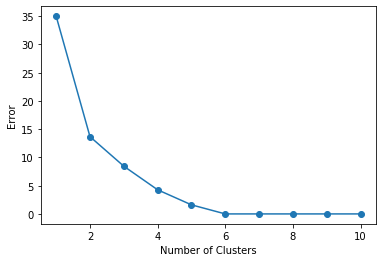

In [277]:
FuzzyCMeans.plot_elbow_curve(1, 10, 1)